In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("scrap price.csv")

In [3]:
df.head()

ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   

       carbody drivewheels enginelocation  wheelbase  ...  enginesize  \
0  convertible         rwd          front       88.6  ...         130   
1  convertible         rwd          front       88.6  ...         130   
2    hatchback         rwd          front       94.5  ...         152   
3        sedan         fwd          front       99.8  ...         109   
4        sedan         4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.shape

In [4]:
df = df.drop(['ID','name'],axis=1)
df.info

<bound method DataFrame.info of      symboling fueltypes aspiration doornumbers      carbody drivewheels  \
0            3       gas        std         two  convertible         rwd   
1            3       gas        std         two  convertible         rwd   
2            1       gas        std         two    hatchback         rwd   
3            2       gas        std        four        sedan         fwd   
4            2       gas        std        four        sedan         4wd   
..         ...       ...        ...         ...          ...         ...   
200         -1       gas        std        four        sedan         rwd   
201         -1       gas      turbo        four        sedan         rwd   
202         -1       gas        std        four        sedan         rwd   
203         -1    diesel      turbo        four        sedan         rwd   
204         -1       gas      turbo        four        sedan         rwd   

    enginelocation  wheelbase  carlength  carwidth  ...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltypes         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumbers       205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheels       205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
column = ['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype',
     'cylindernumber', 'fuelsystem']
for i in column:
    print("uniques values for {0} :".format(i), df[i].unique())

uniques values for fueltypes : ['gas' 'diesel']
uniques values for aspiration : ['std' 'turbo']
uniques values for doornumbers : ['two' 'four']
uniques values for carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
uniques values for drivewheels : ['rwd' 'fwd' '4wd']
uniques values for enginelocation : ['front' 'rear']
uniques values for enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
uniques values for cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
uniques values for fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [7]:
fueltypes_ = {'gas':0, 'diesel':1}
aspiration_ = {'std':0, 'turbo':1}
doornumbers_ = {'two': 2, 'four':4}
carbody_ = {'convertible':0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4}
drivewheels_ = {'rwd':0, 'fwd':1, '4wd':3}
enginelocation_ = {'front':0, 'rear':1}
enginetype_ = {'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':7}
cylindernumber_ = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
fuelsystem_ = {'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7}

In [8]:
df['fueltypes'] = df['fueltypes'].map(fueltypes_)
df['aspiration'] = df['aspiration'].map(aspiration_)
df['doornumbers'] = df['doornumbers'].map(doornumbers_)
df['carbody'] = df['carbody'].map(carbody_)
df['drivewheels'] = df['drivewheels'].map(drivewheels_)
df['enginelocation'] = df['enginelocation'].map(enginelocation_)
df['enginetype'] = df['enginetype'].map(enginetype_)
df['cylindernumber'] = df['cylindernumber'].map(cylindernumber_)
df['fuelsystem'] = df['fuelsystem'].map(fuelsystem_)
df

symboling  fueltypes  aspiration  doornumbers  carbody  drivewheels  \
0            3          0           0            2        0            0   
1            3          0           0            2        0            0   
2            1          0           0            2        1            0   
3            2          0           0            4        2            1   
4            2          0           0            4        2            3   
..         ...        ...         ...          ...      ...          ...   
200         -1          0           0            4        2            0   
201         -1          0           1            4        2            0   
202         -1          0           0            4        2            0   
203         -1          1           1            4        2            0   
204         -1          0           1            4        2            0   

     enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0                 0       88.6      168.8      64.1  ...         130   
1                 0       88.6      168.8      64.1  ...         130   
2                 0       94.5      171.2      65.5  ...         152   
3                 0       99.8      176.6      66.2  ...         109   
4                 0       99.4      176.6      66.4  ...         136   
..              ...        ...        ...       ...  ...         ...   
200               0      109.1      188.8      68.9  ...         141   
201               0      109.1      188.8      68.8  ...         141   
202               0      109.1      188.8      68.9  ...         173   
203               0      109.1      188.8      68.9  ...         145   
204               0      109.1      188.8      68.9  ...         141   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0             0       3.47    2.68               9.0         111     5000   
1             0       3.47    2.68               9.0         111     5000   
2             0       2.68    3.47               9.0         154     5000   
3             0       3.19    3.40              10.0         102     5500   
4             0       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200           0       3.78    3.15               9.5         114     5400   
201           0       3.78    3.15               8.7         160     5300   
202           0       3.58    2.87               8.8         134     5500   
203           6       3.01    3.40              23.0         106     4800   
204           0       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 24 columns]

In [9]:
X_res = df.drop(['enginetype','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'],axis=1).values
y_res = df[['enginetype','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
scaler = StandardScaler()
y_res = scaler.fit_transform(y_res)

In [10]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]

In [11]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_MAPE = []

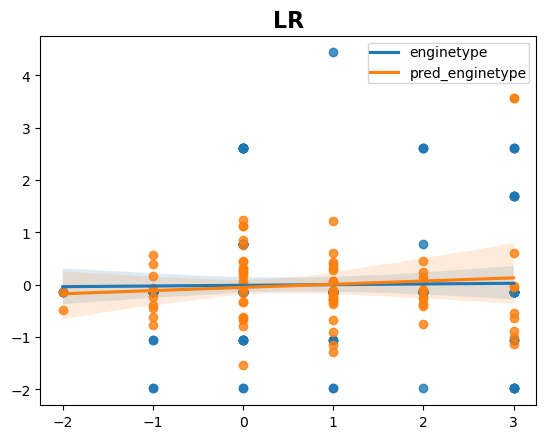

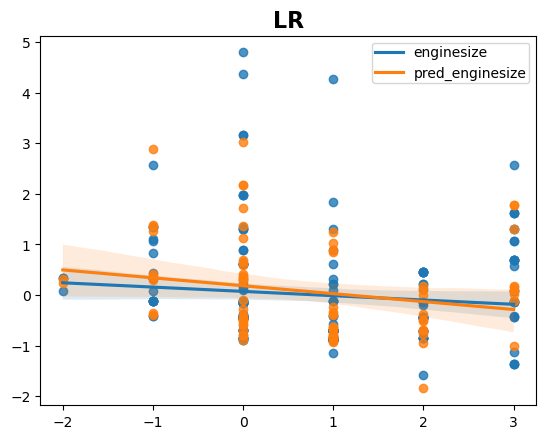

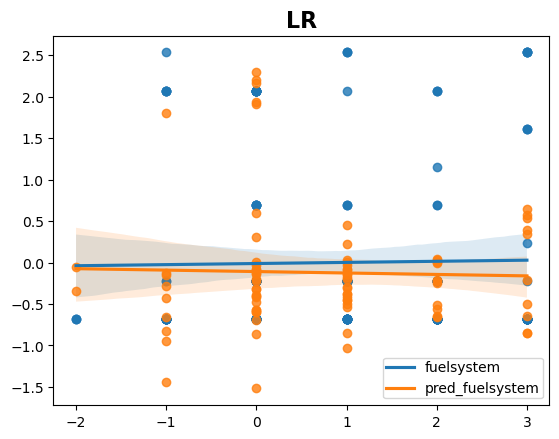

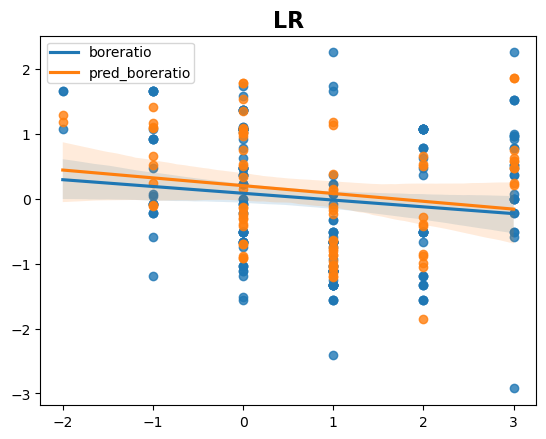

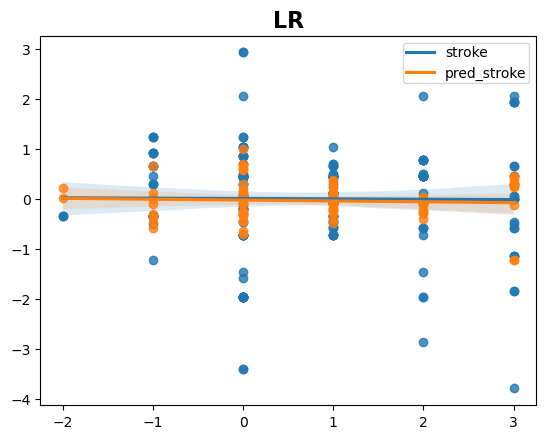

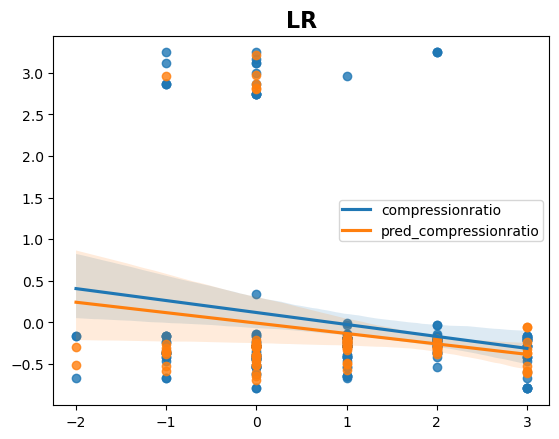

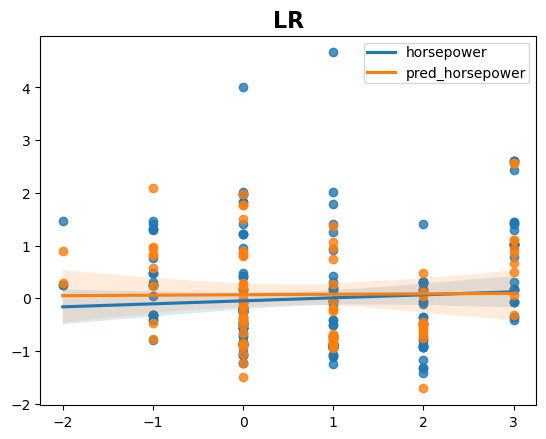

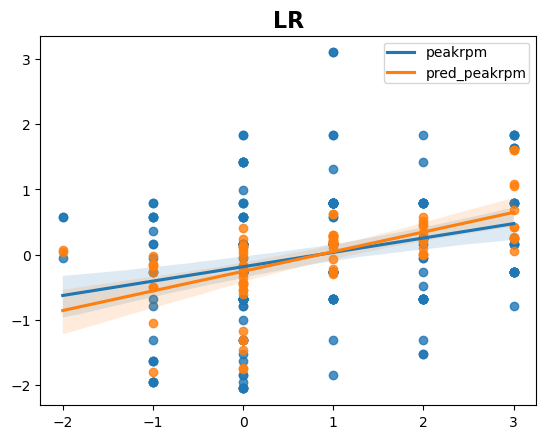

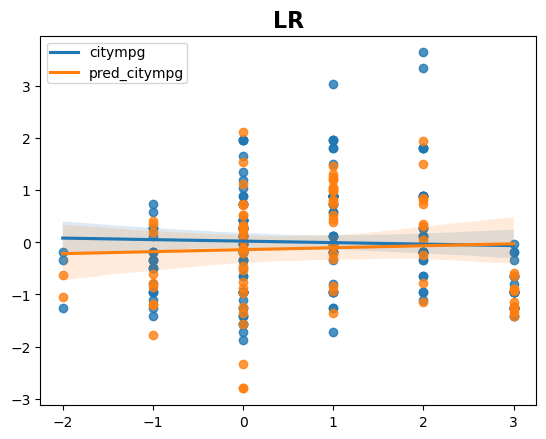

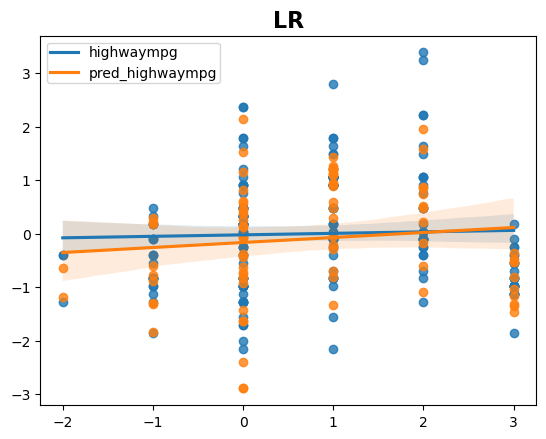

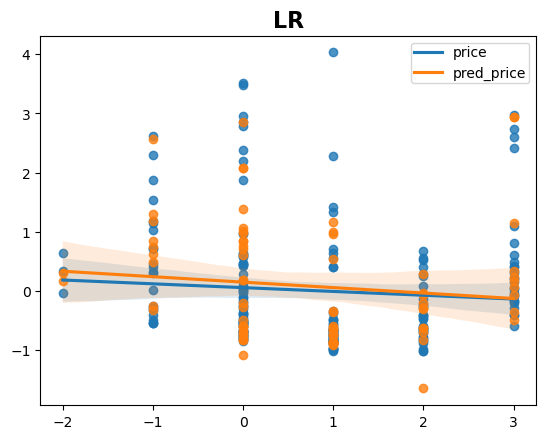

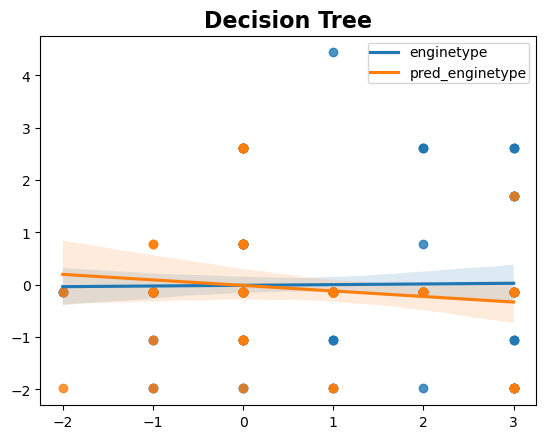

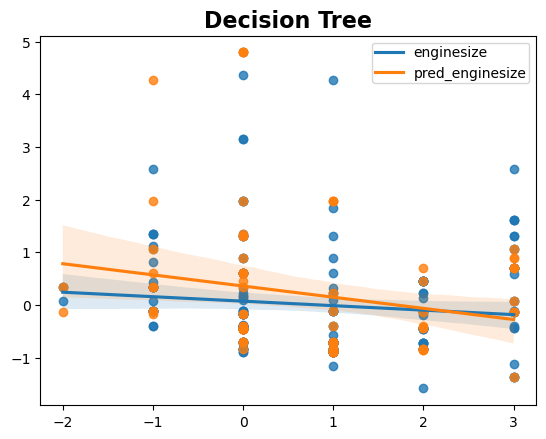

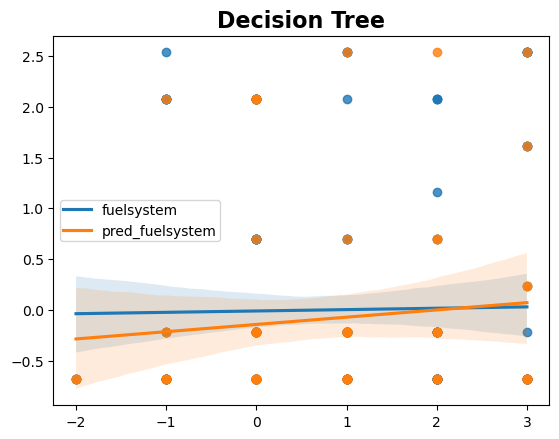

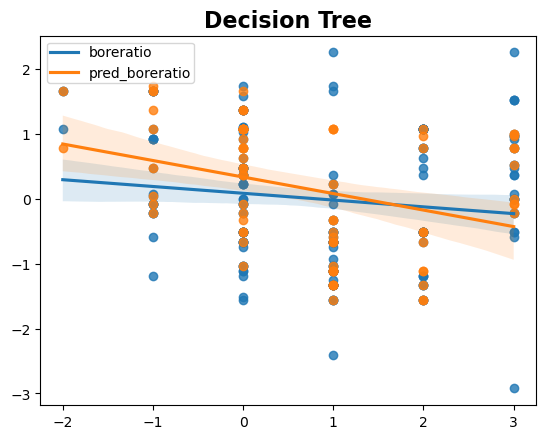

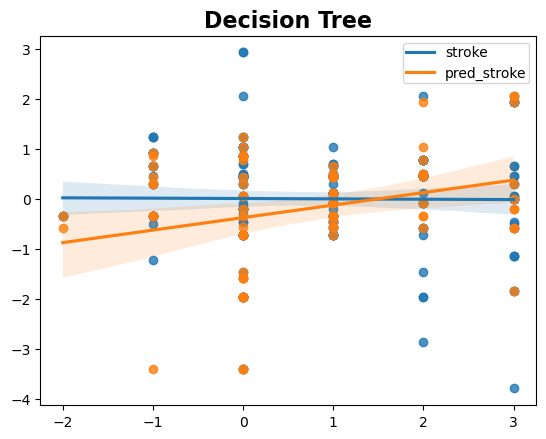

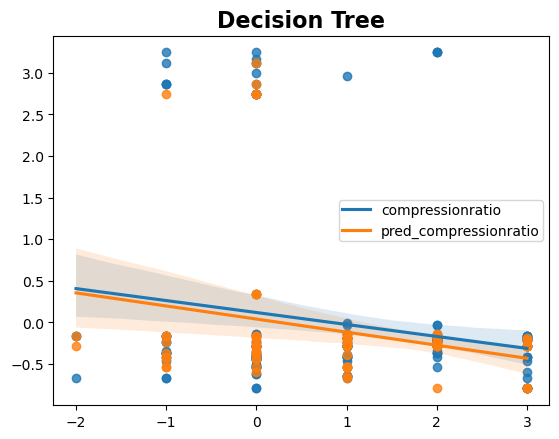

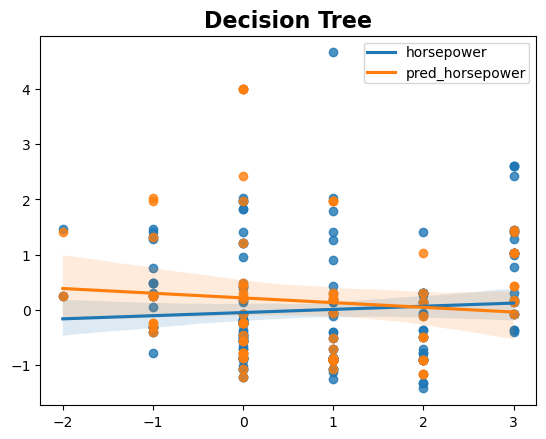

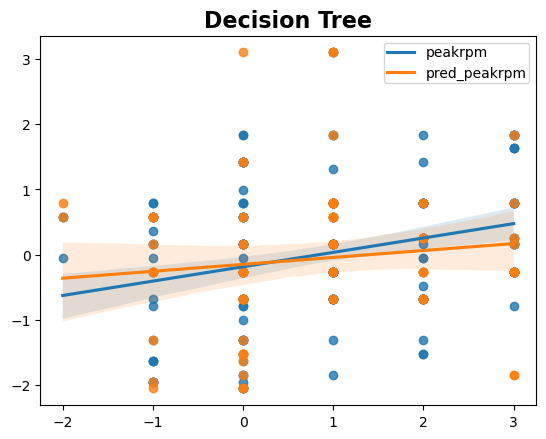

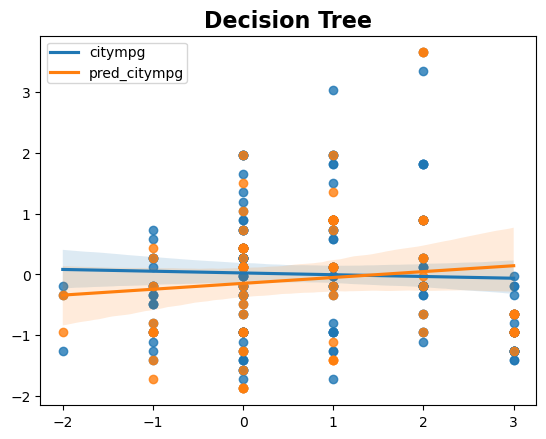

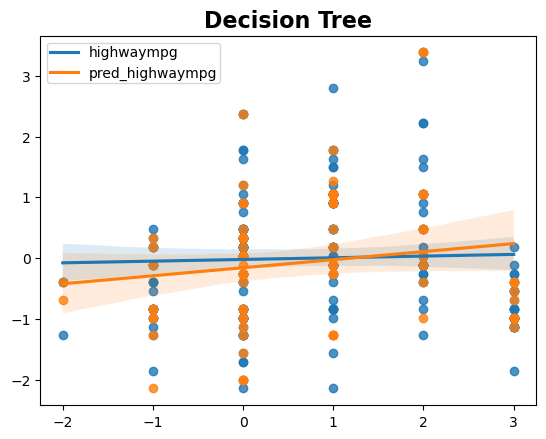

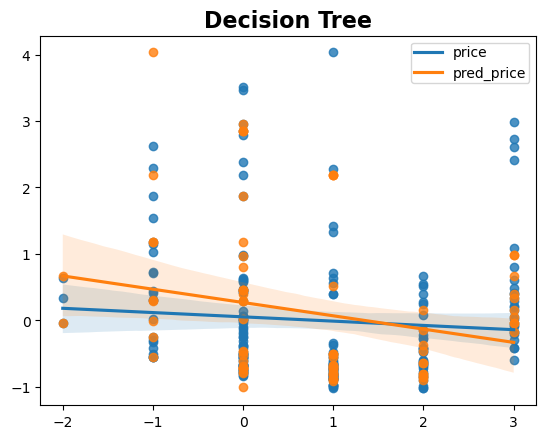

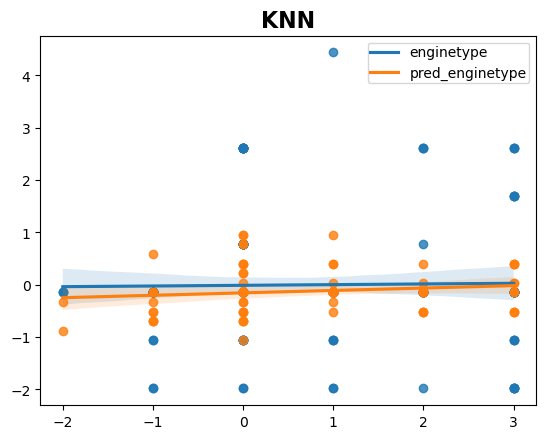

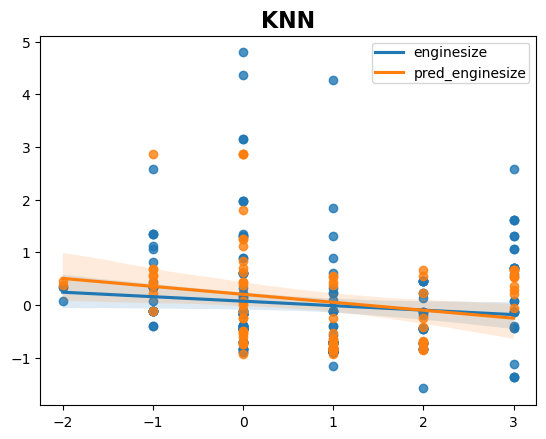

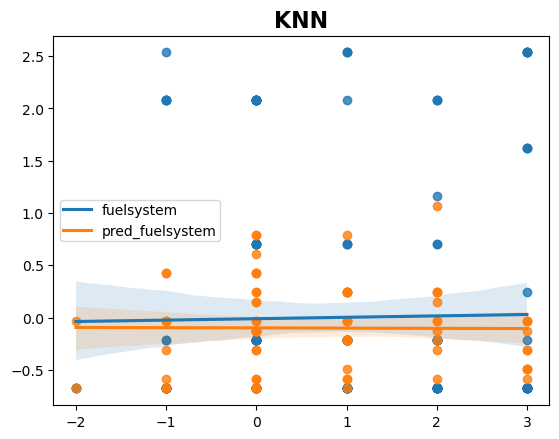

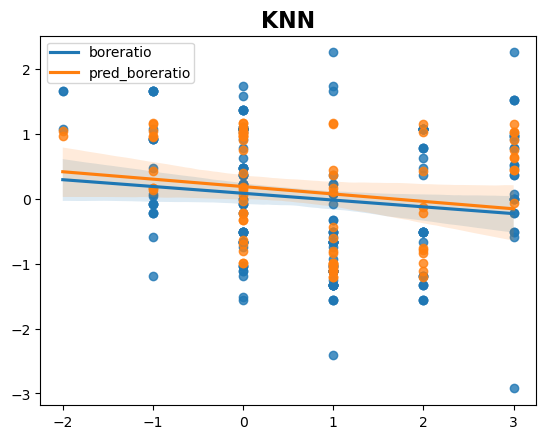

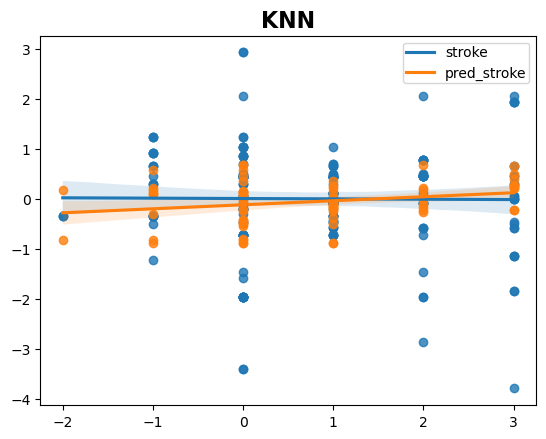

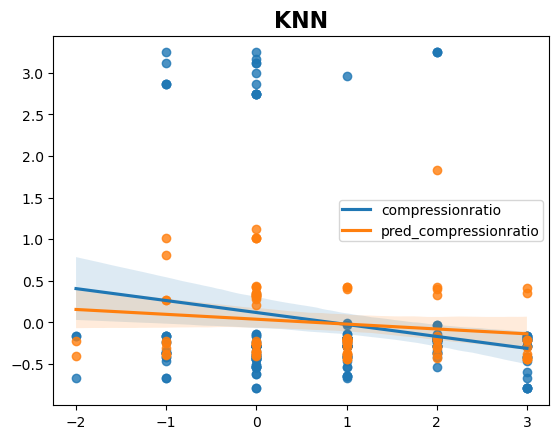

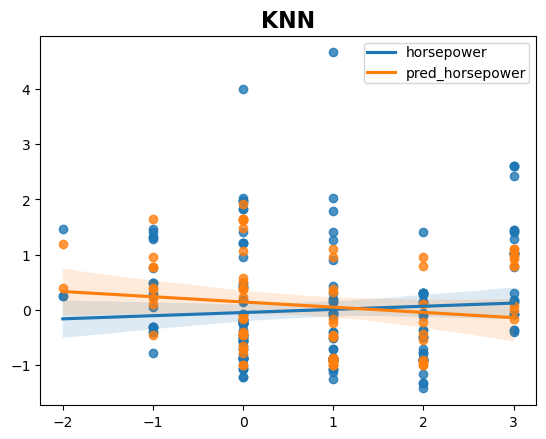

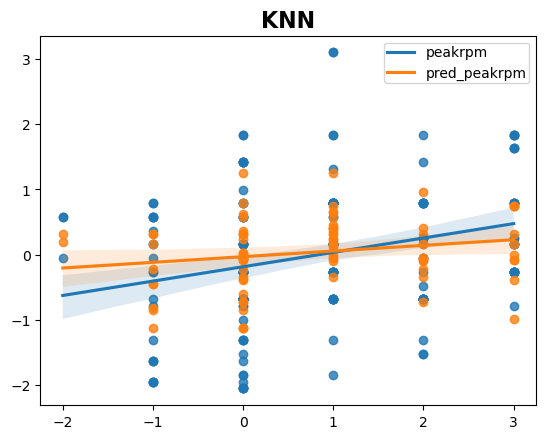

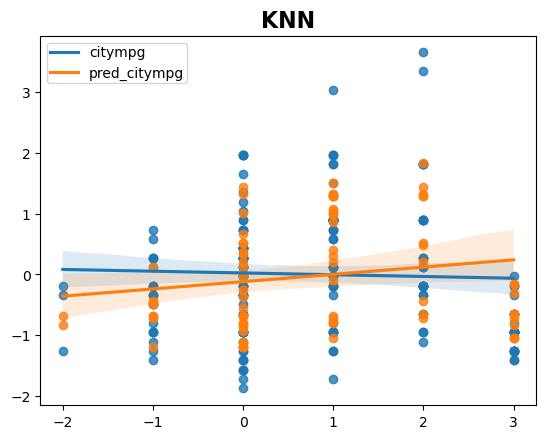

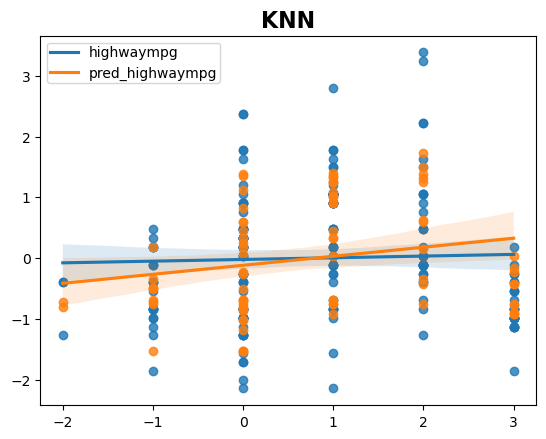

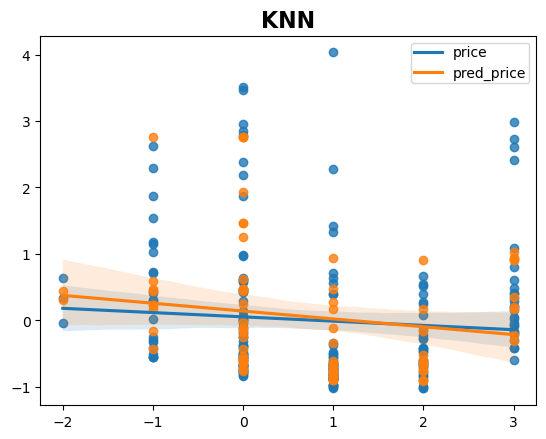

In [12]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'enginetype'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_enginetype'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'enginesize'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_enginesize'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'fuelsystem'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_fuelsystem'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'boreratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_boreratio'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'stroke'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_stroke'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'compressionratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_compressionratio'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'horsepower'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_horsepower'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'peakrpm'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_peakrpm'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'citympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_citympg'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'highwaympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_highwaympg'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'price'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_price'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,mean_absolute_percentage_error(y_test,y_pred)))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [13]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('LR', array([0.7572364])),
 ('Decision Tree', array([0.74321356])),
 ('KNN', array([0.59273012]))]

In [14]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('LR', array([0.57340697])),
 ('Decision Tree', array([0.55236639])),
 ('KNN', array([0.35132899]))]

In [15]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('KNN', 615.3235776533788),
 ('Decision Tree', 513.7230282617088),
 ('LR', 405.0114457664389)]

In [16]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.5485033050297354),
 ('LR', 0.4348499280806983),
 ('Decision Tree', 0.33994023678219637)]

In [17]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 2.310518682947635),
 ('KNN', 1.9419626002722017),
 ('Decision Tree', 1.32329694881873)]

In [18]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.6821769153585131),
 ('Decision Tree', 0.569537725345575),
 ('LR', 0.44901490661467724)]

In [19]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.7841316567963847),
 ('Decision Tree', 0.6976630899083477),
 ('LR', 0.6035689320461981)]

In [20]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()

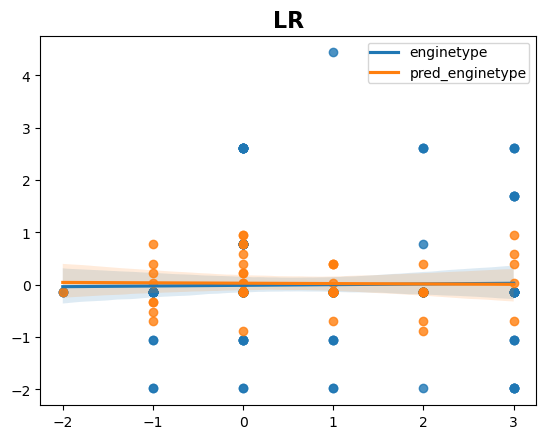

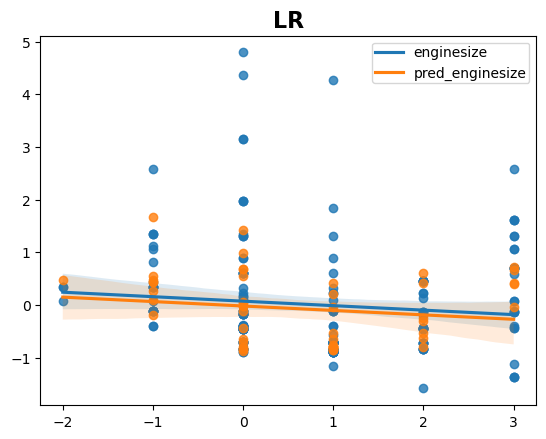

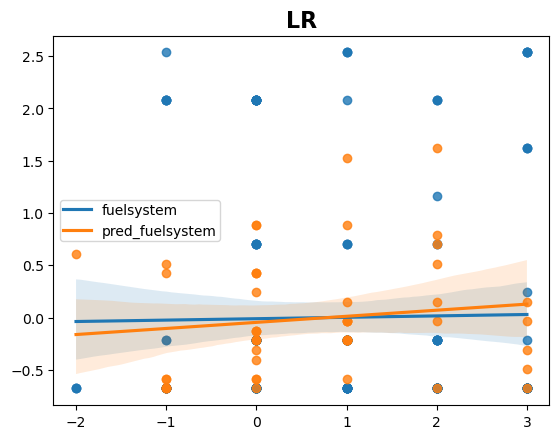

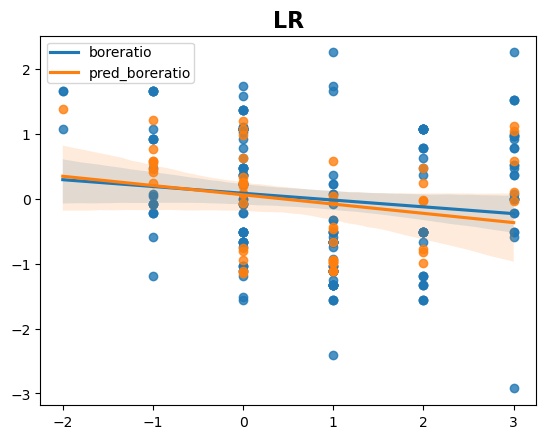

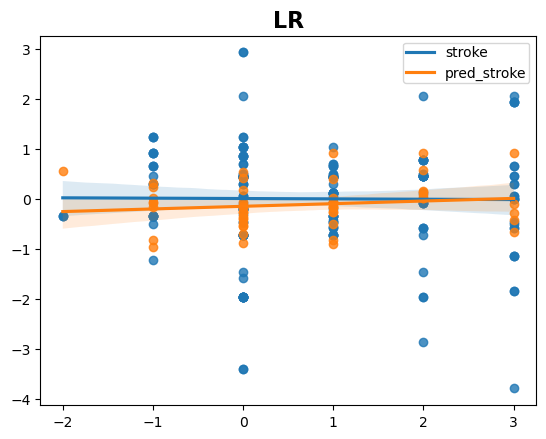

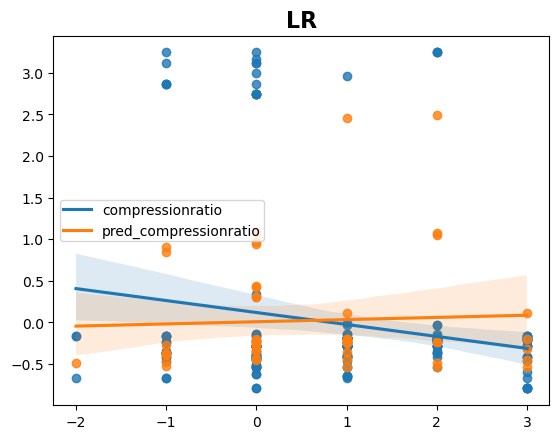

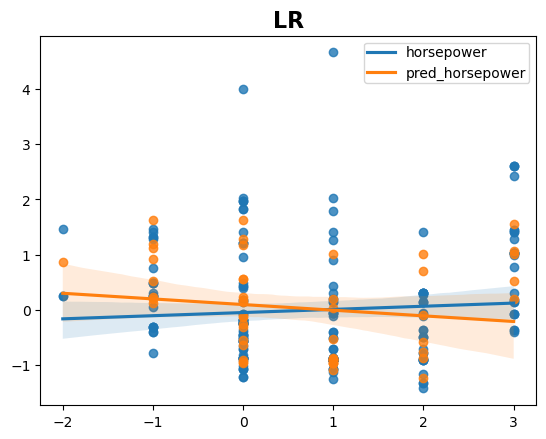

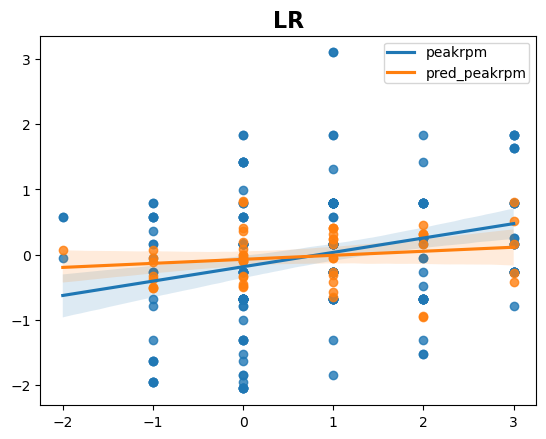

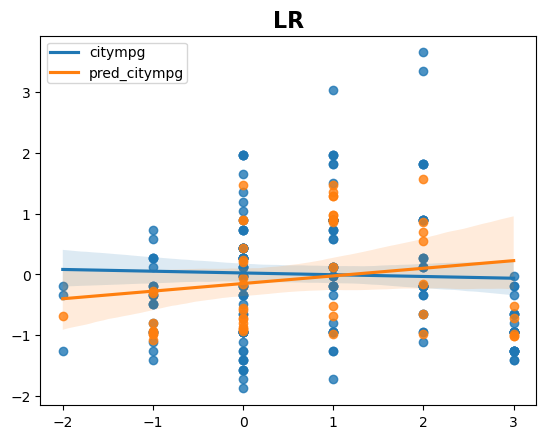

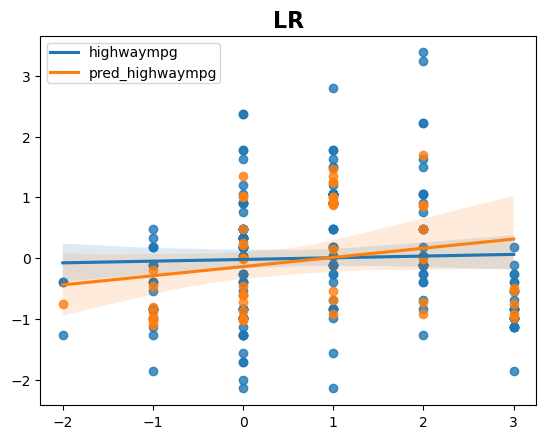

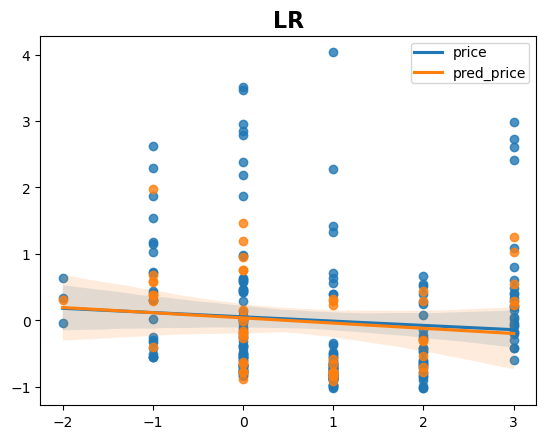

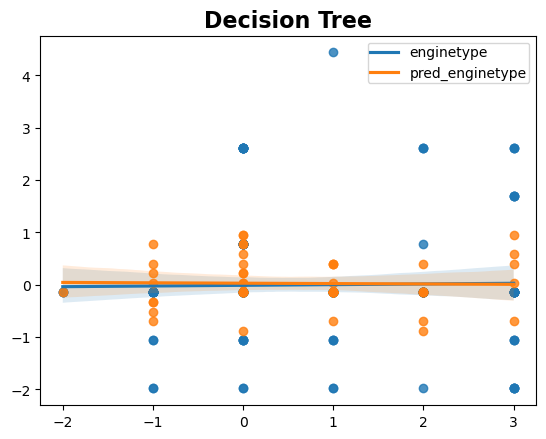

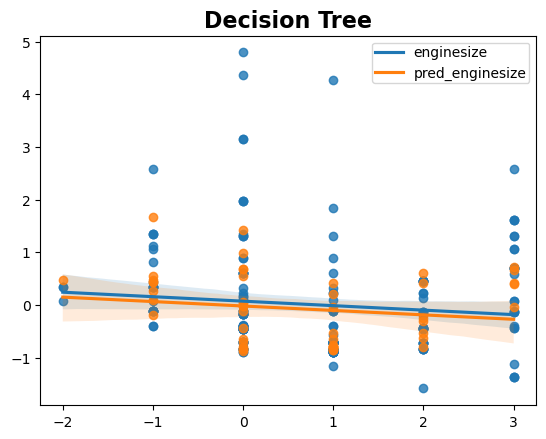

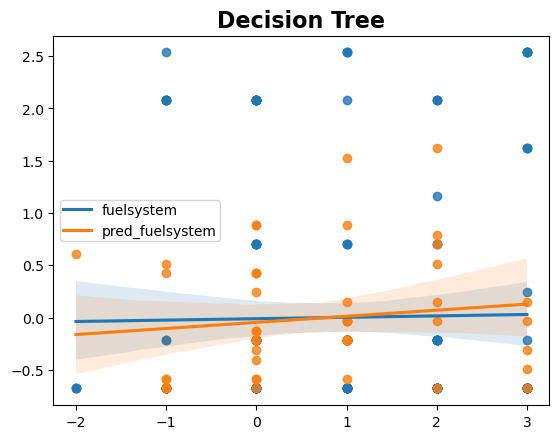

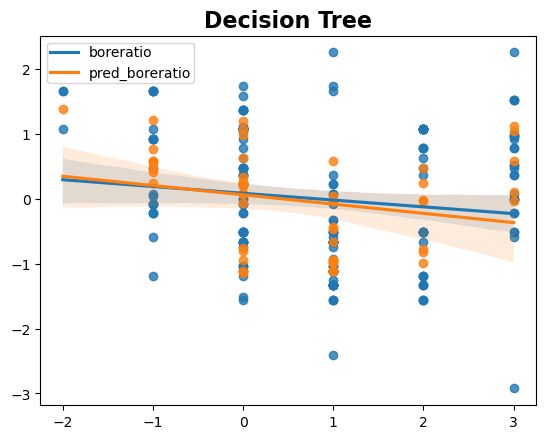

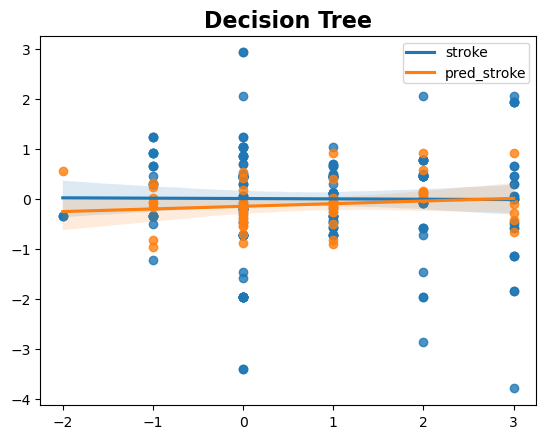

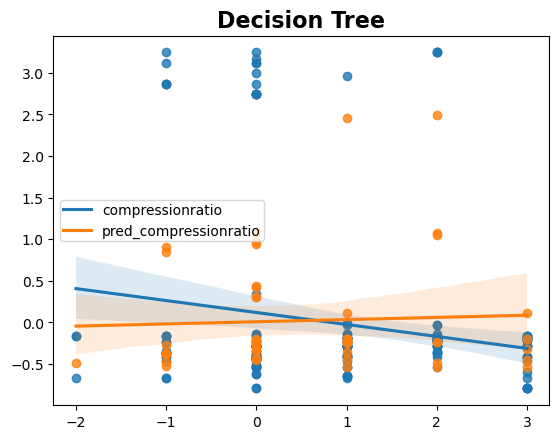

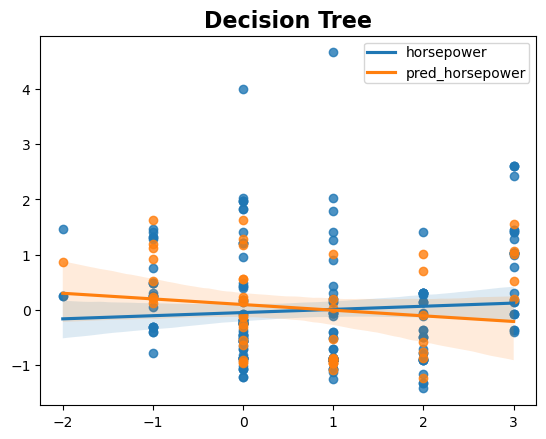

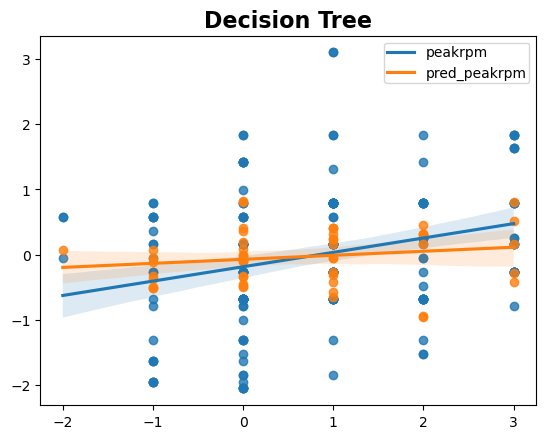

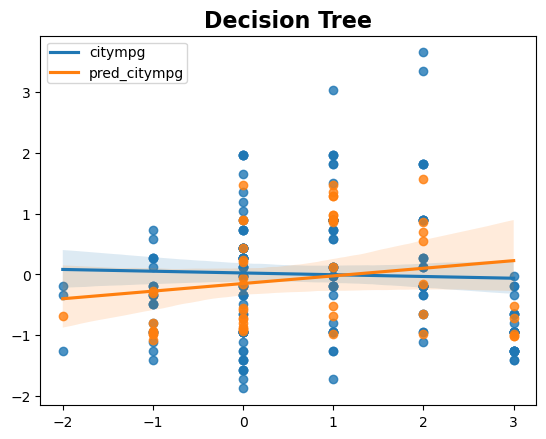

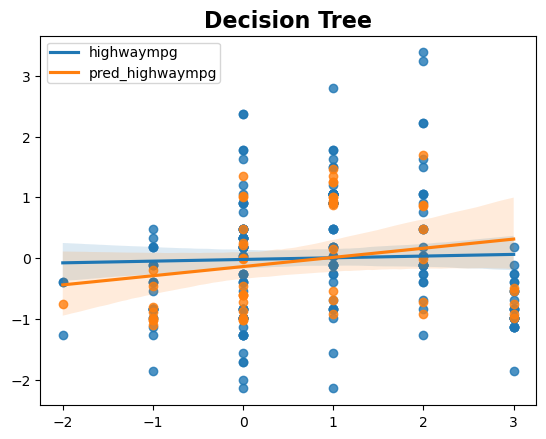

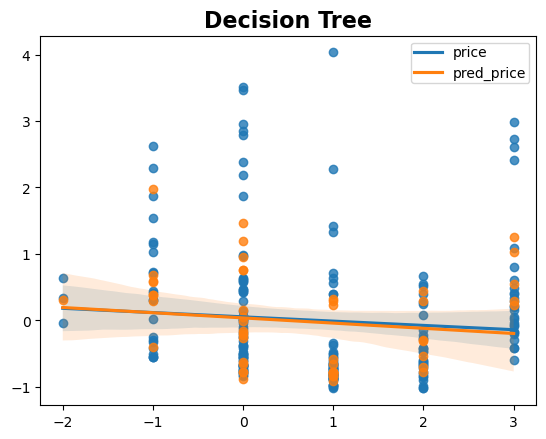

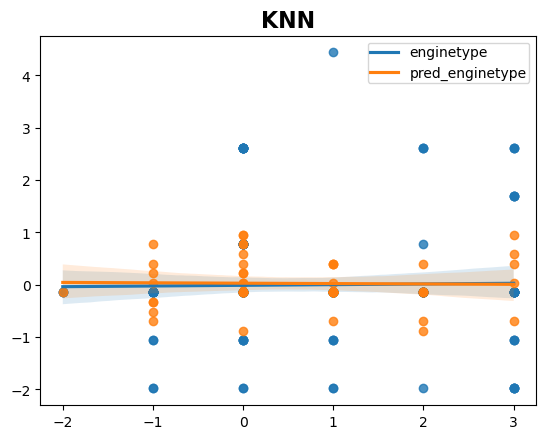

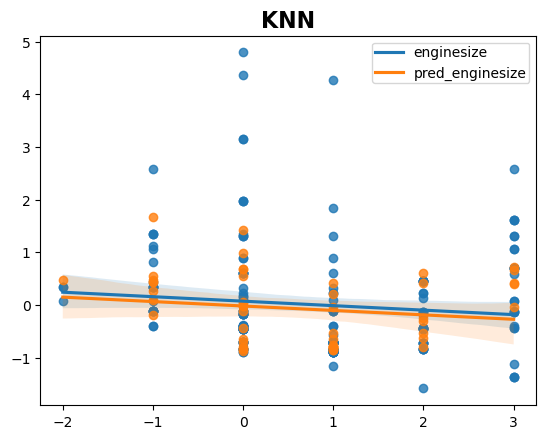

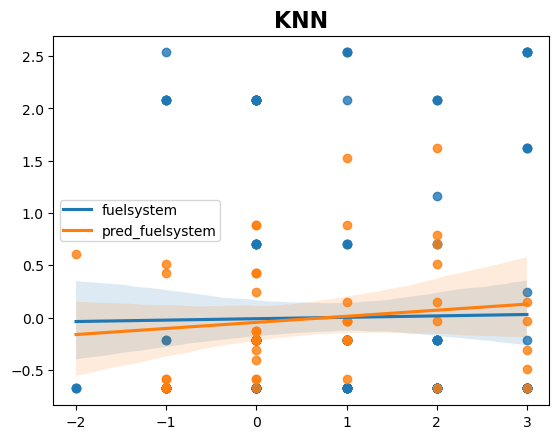

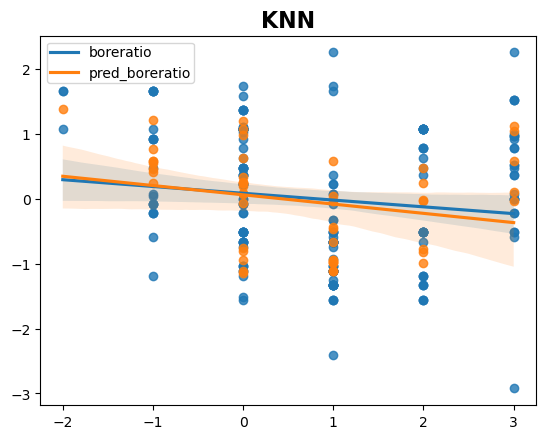

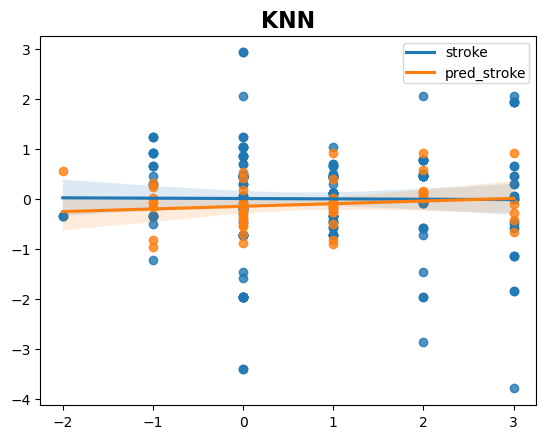

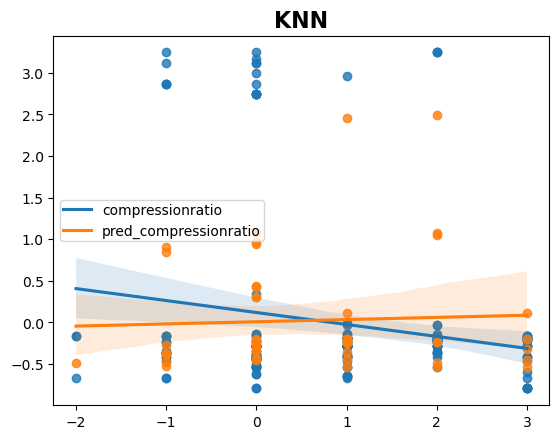

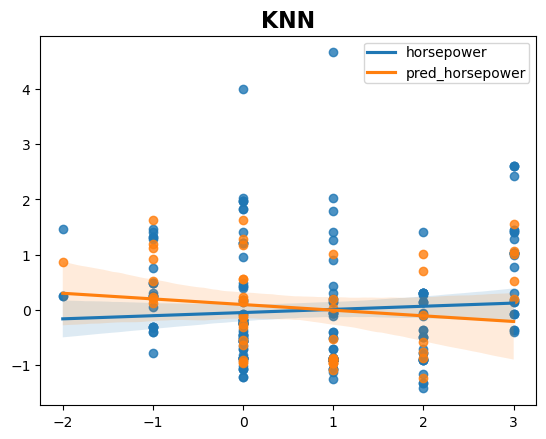

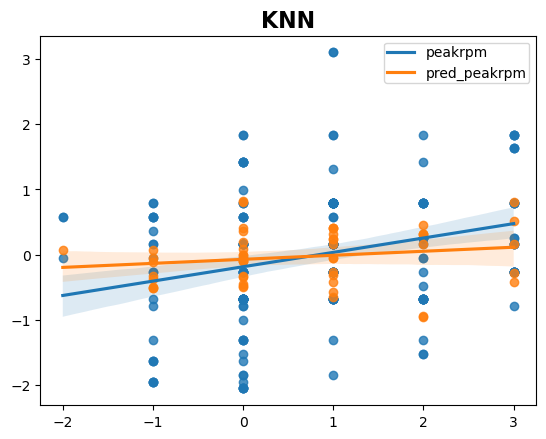

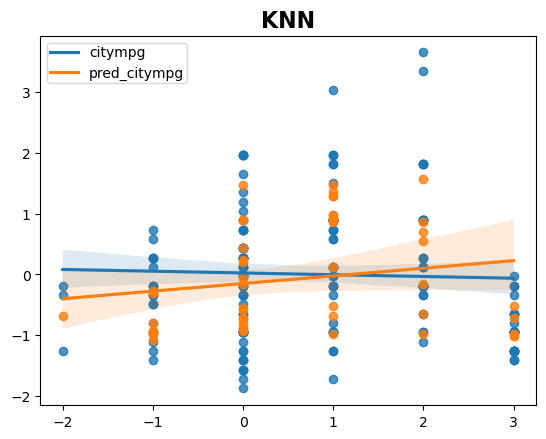

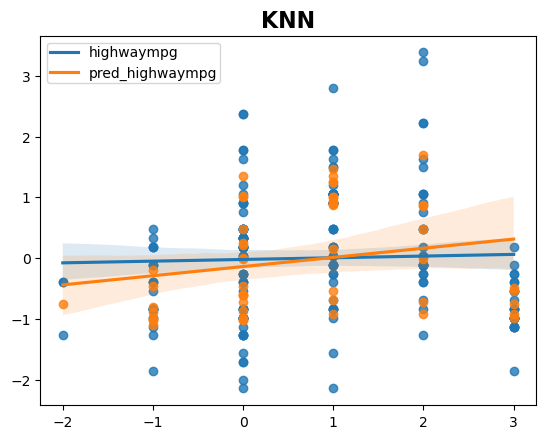

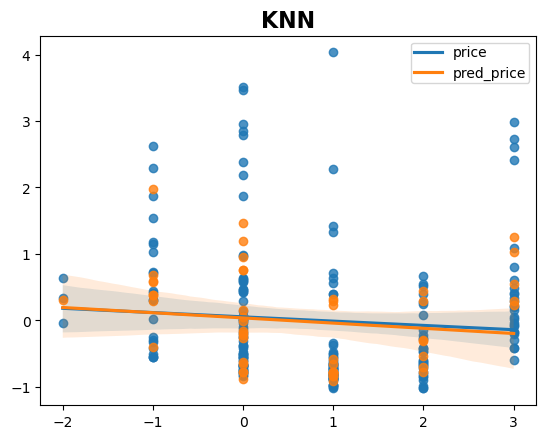

In [21]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'enginetype'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_enginetype'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'enginesize'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_enginesize'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'fuelsystem'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_fuelsystem'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'boreratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_boreratio'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'stroke'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_stroke'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'compressionratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_compressionratio'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'horsepower'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_horsepower'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'peakrpm'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_peakrpm'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'citympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_citympg'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'highwaympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_highwaympg'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'price'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_price'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [22]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('LR', array([0.77190544])),
 ('Decision Tree', array([0.77031054])),
 ('KNN', array([0.54057824]))]

In [23]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('LR', array([0.59706375])),
 ('Decision Tree', array([0.59579709])),
 ('KNN', array([0.29570335]))]

In [24]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('KNN', 422.17796259618),
 ('Decision Tree', 265.3196796948888),
 ('LR', 234.89088113208211)]

In [25]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.5681661972516053),
 ('LR', 0.4100476057666092),
 ('Decision Tree', 0.296334115290959)]

In [26]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 2.835431836021768),
 ('KNN', 2.3666060034373024),
 ('Decision Tree', 1.7502436553009413)]

In [27]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.7380733611821325),
 ('Decision Tree', 0.4638455938721833),
 ('LR', 0.41064839358755617)]

In [28]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.8251358051934815),
 ('Decision Tree', 0.6218819105632838),
 ('LR', 0.5797579683221179)]

In [29]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

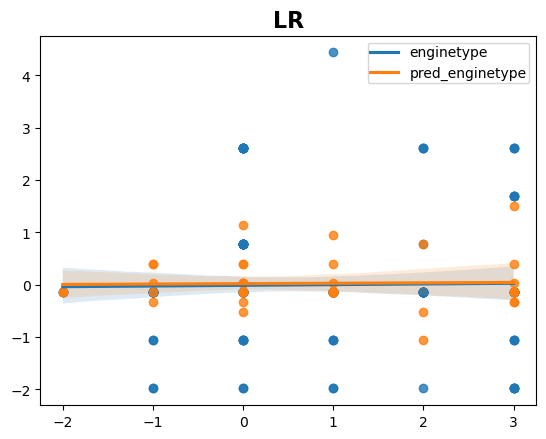

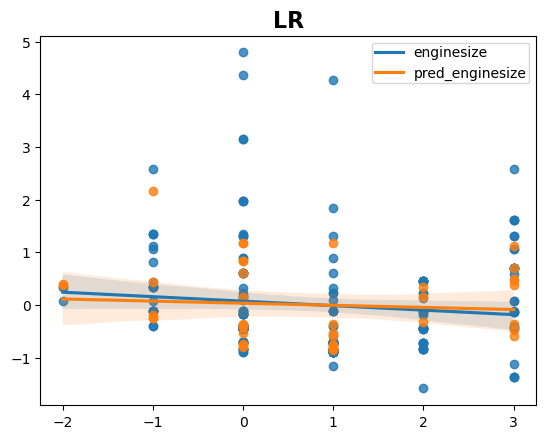

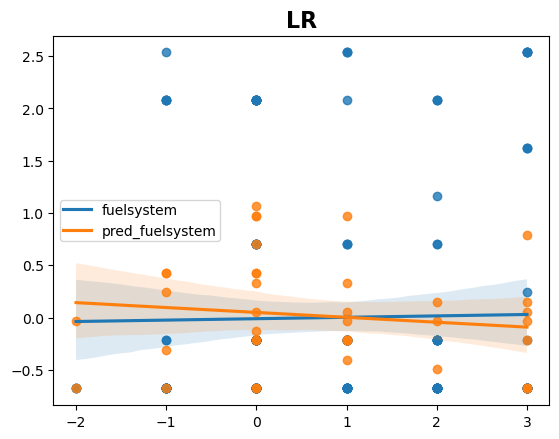

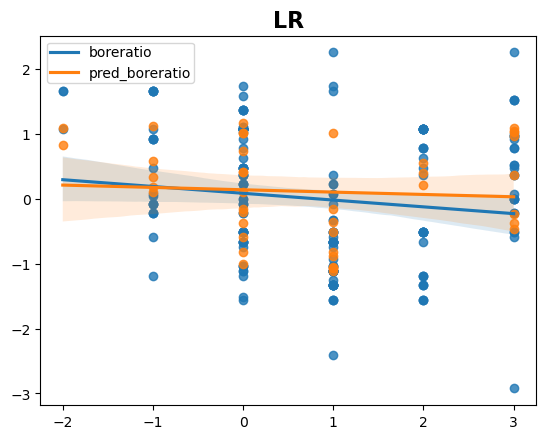

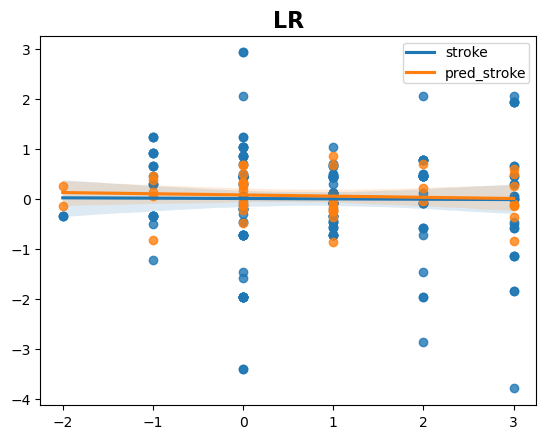

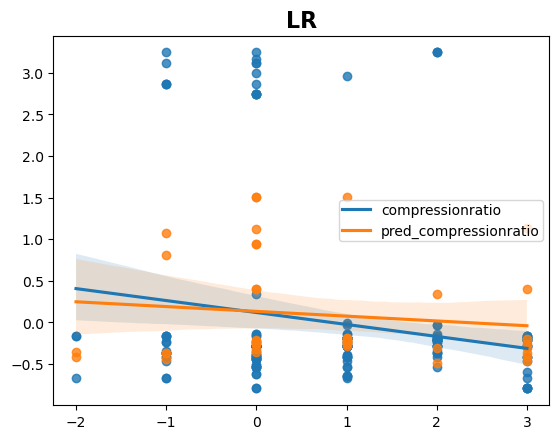

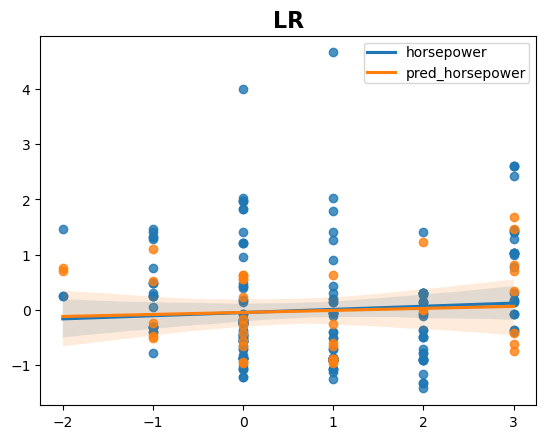

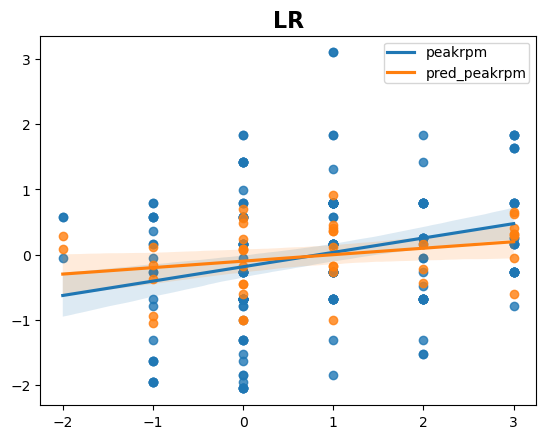

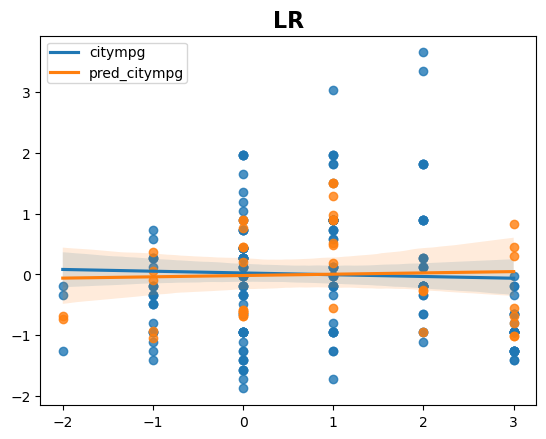

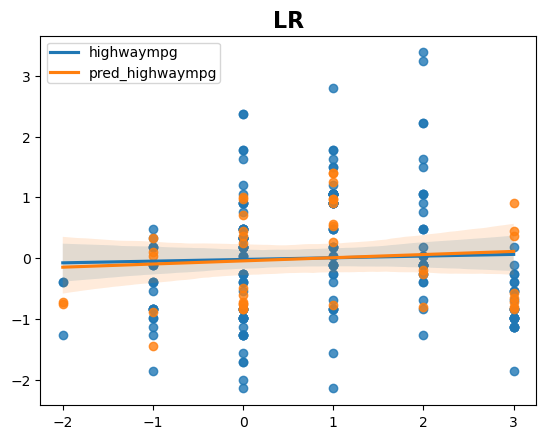

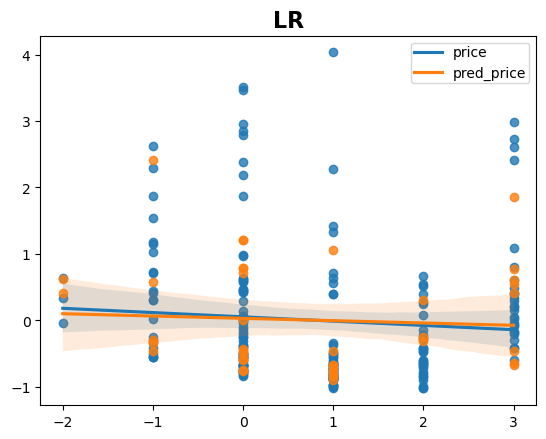

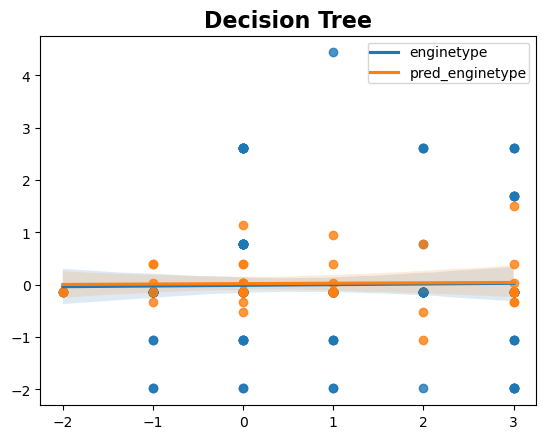

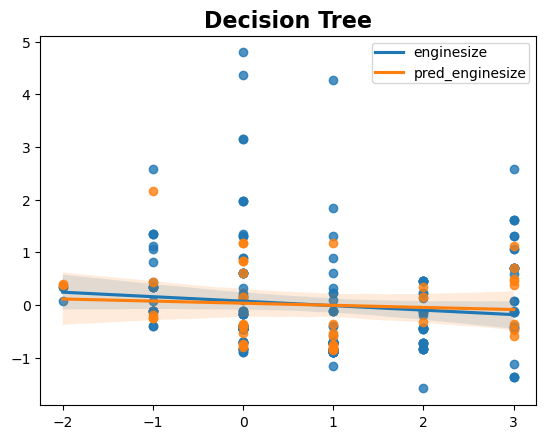

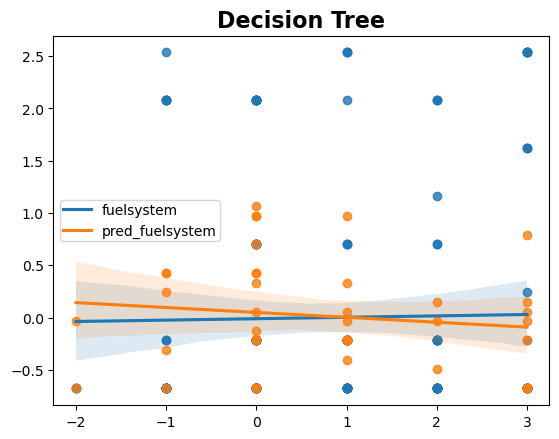

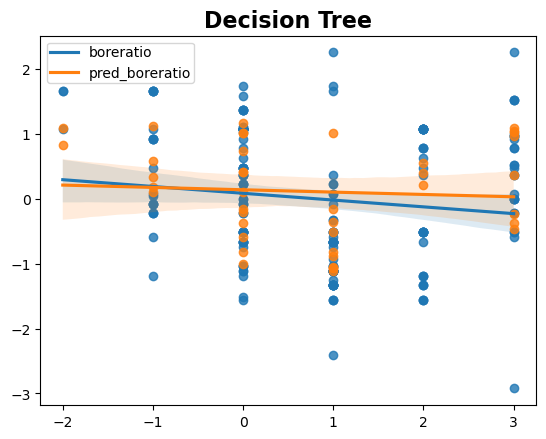

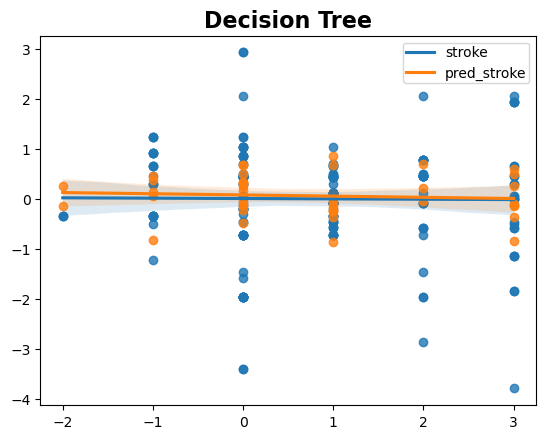

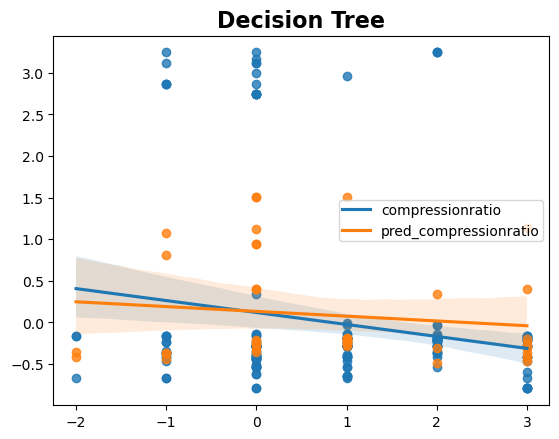

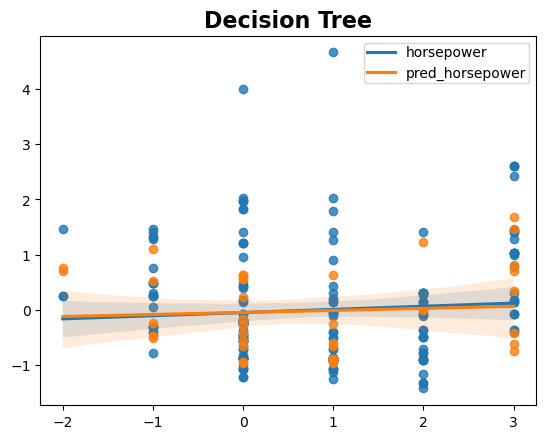

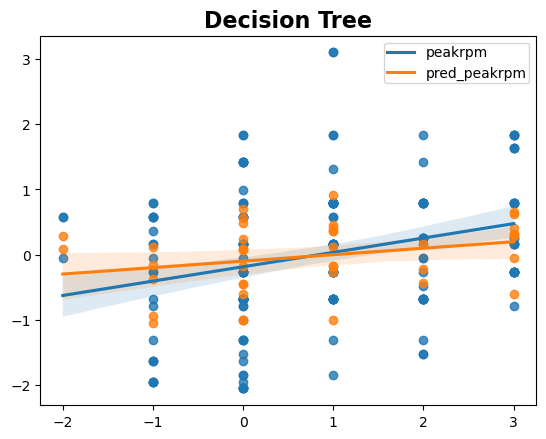

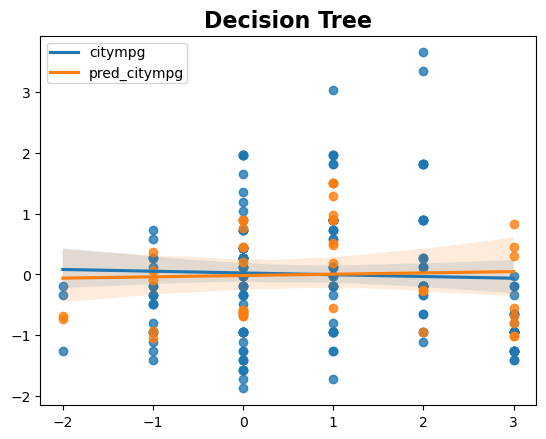

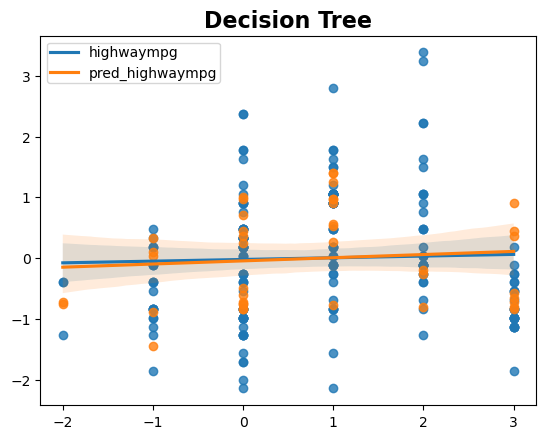

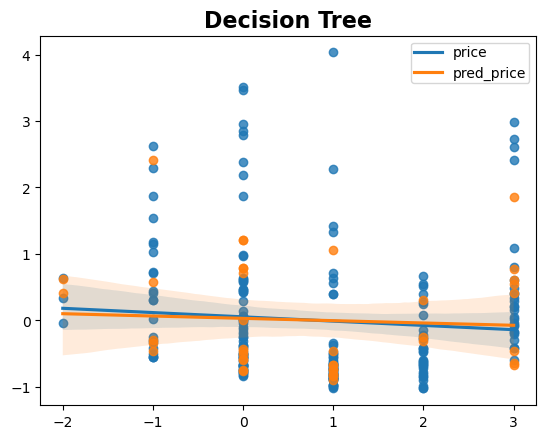

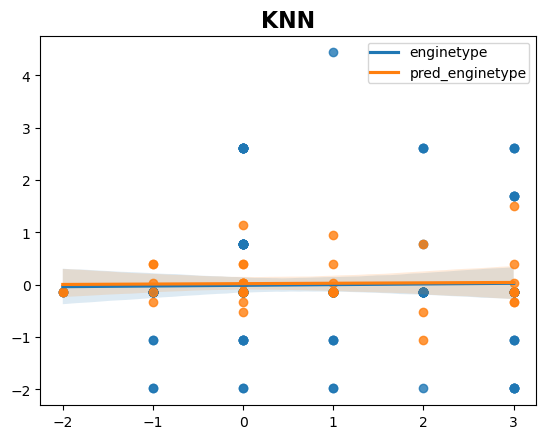

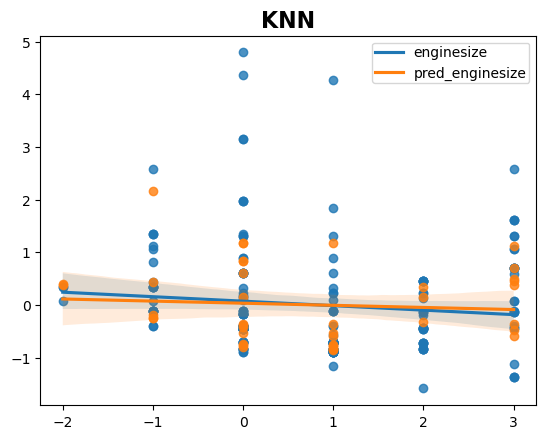

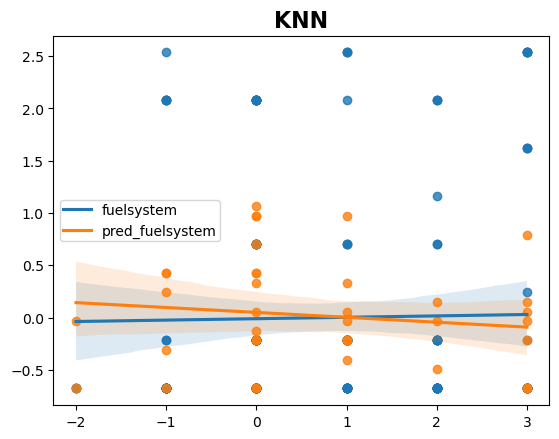

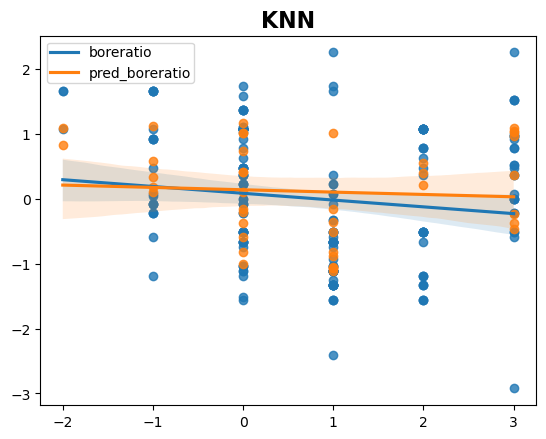

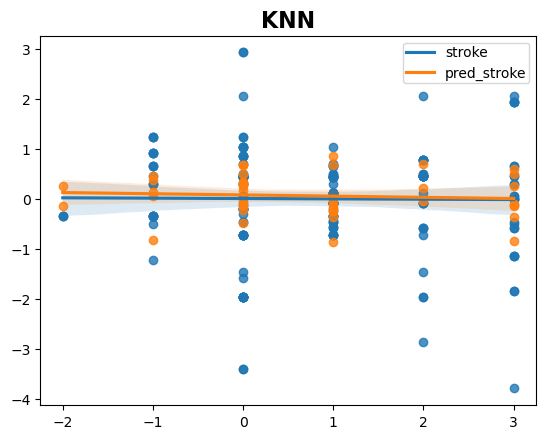

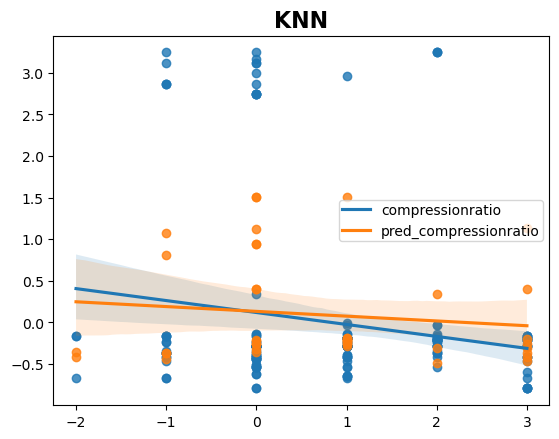

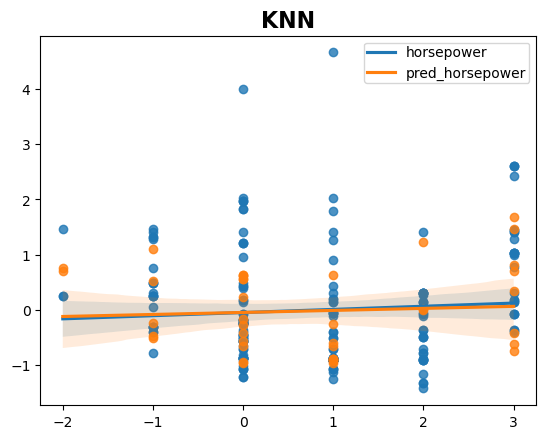

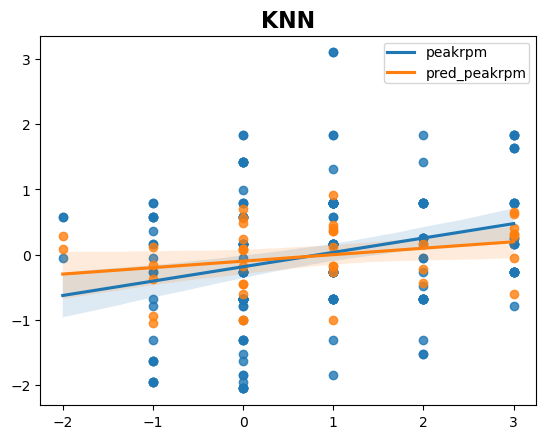

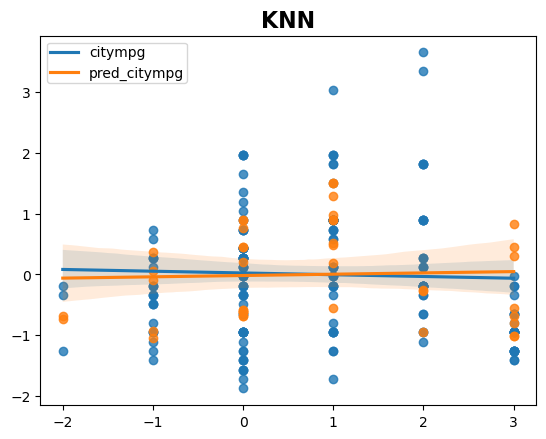

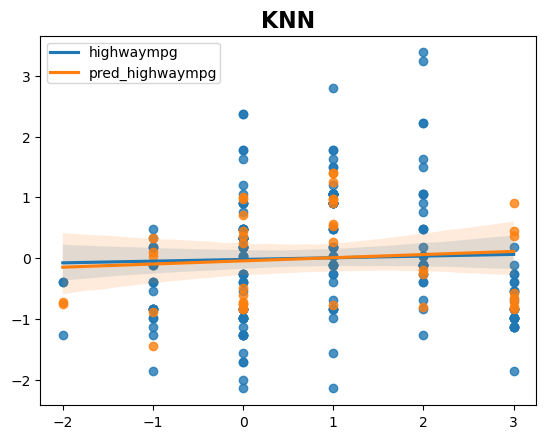

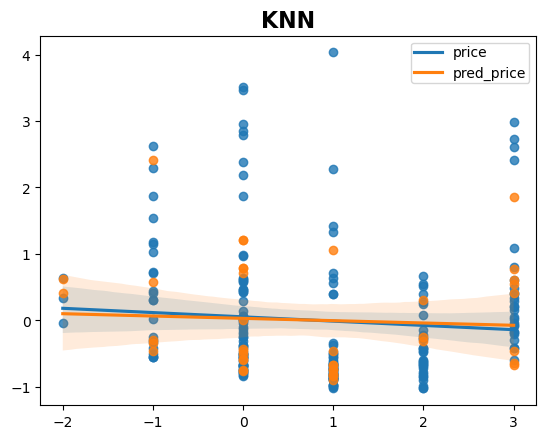

In [30]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X_res):
    j=0
    X_train, X_test, y_train, y_test = X_res[train], X_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        j += 1

j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,0], line_kws={'label': 'enginetype'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_enginetype'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,1], line_kws={'label': 'enginesize'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_enginesize'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    fig, cx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,2], line_kws={'label': 'fuelsystem'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,2], line_kws={'label': 'pred_fuelsystem'})
    cx.legend(borderpad=.2)
    cx.set_title(nombre,fontsize=16, weight="bold")
    fig, dx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,3], line_kws={'label': 'boreratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,3], line_kws={'label': 'pred_boreratio'})
    dx.legend(borderpad=.2)
    dx.set_title(nombre,fontsize=16, weight="bold")
    fig, ex = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,4], line_kws={'label': 'stroke'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,4], line_kws={'label': 'pred_stroke'})
    ex.legend(borderpad=.2)
    ex.set_title(nombre,fontsize=16, weight="bold")
    fig, fx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,5], line_kws={'label': 'compressionratio'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,5], line_kws={'label': 'pred_compressionratio'})
    fx.legend(borderpad=.2)
    fx.set_title(nombre,fontsize=16, weight="bold")
    fig, gx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,6], line_kws={'label': 'horsepower'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,6], line_kws={'label': 'pred_horsepower'})
    gx.legend(borderpad=.2)
    gx.set_title(nombre,fontsize=16, weight="bold")
    fig, hx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,7], line_kws={'label': 'peakrpm'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,7], line_kws={'label': 'pred_peakrpm'})
    hx.legend(borderpad=.2)
    hx.set_title(nombre,fontsize=16, weight="bold")
    fig, ix = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,8], line_kws={'label': 'citympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,8], line_kws={'label': 'pred_citympg'})
    ix.legend(borderpad=.2)
    ix.set_title(nombre,fontsize=16, weight="bold")
    fig, jx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,9], line_kws={'label': 'highwaympg'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,9], line_kws={'label': 'pred_highwaympg'})
    jx.legend(borderpad=.2)
    jx.set_title(nombre,fontsize=16, weight="bold")
    fig, kx = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = np.array(y_res)[:,10], line_kws={'label': 'price'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,10], line_kws={'label': 'pred_price'})
    kx.legend(borderpad=.2)
    kx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [31]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.78325457])),
 ('LR', array([0.77191015])),
 ('KNN', array([0.57548175]))]

In [32]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.61790909])),
 ('LR', array([0.59693356])),
 ('KNN', array([0.33186984]))]

In [33]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('KNN', 311.11242807329825),
 ('Decision Tree', 188.56425269544636),
 ('LR', 183.51661287271773)]

In [34]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.5529384929956814),
 ('LR', 0.4139802520441888),
 ('Decision Tree', 0.27520373764639405)]

In [35]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 3.834889665665611),
 ('KNN', 2.2566389565880427),
 ('Decision Tree', 2.13871564011158)]

In [36]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.6898280001625239),
 ('Decision Tree', 0.4181025558657348),
 ('LR', 0.4069104498286425)]

In [37]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.7954847083537416),
 ('Decision Tree', 0.581743887436045),
 ('LR', 0.5788257896197784)]

In [38]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()